In [19]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
# Colour Scheme
plt.style.use('seaborn-darkgrid')
# dark style colours
plt.rcParams["image.cmap"] = "Dark2"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

In [20]:
# Load Data
sph_exa = ['sphexa']
sedov_versions = ['sedov_wone',
            'sedov_cstone',
            'sedov_west',
            'sedov_wisb',
            'sedov_wser',]

outputdir = "./out/"



In [21]:
allresults = []
# Read file line by line
for sedov_version in sedov_versions + sph_exa:
    print(sedov_version)
    dir = outputdir + sedov_version + "/"
    configs = glob.glob(dir + "*.txt")
    # From all the configs with data on them in the directory, read in their times
    for config in configs:
        with open(config) as f:
            lines = f.readlines()
            lines = [line.strip() for line in lines]
            times = []
            for line in lines:
                # Check file exists
                try:
                    with open(outputdir + "slurms/" + line) as f2:
                        lines2 = f2.readlines()
                        lines2 = [line2.strip() for line2 in lines2]
                        if len(lines2) > 0:
                            times.append(lines2[0])
                except FileNotFoundError:
                    print("File not found: " + line)
                except IsADirectoryError:
                    print("Is a directory: " + line)

            config_split = config.split("-")
            n_particles = int(config_split[0].split("/")[-1])
            totalparticles = n_particles * n_particles * n_particles
            timestep = float(config_split[1])
            threads = int(config_split[2])
            avgtime = np.mean([float(time) for time in times])
            trials = len(times)
            allresults.append([sedov_version,n_particles,totalparticles,timestep,threads,avgtime,trials])
        
print(allresults)

sedov_wone
File not found: slurm-.out
File not found: slurm-.out
File not found: slurm-.out
File not found: slurm-.out
File not found: slurm-.out
sedov_cstone
Is a directory: 
sedov_west
sedov_wisb
File not found: slurm-872832.out
sedov_wser
sphexa
[['sedov_wone', 30, 27000, 100.0, 2, 38.08, 1], ['sedov_wone', 30, 27000, 100.0, 8, 28.97, 1], ['sedov_wone', 30, 27000, 100.0, 32, 30.68, 1], ['sedov_wone', 20, 8000, 100.0, 4, 0.0, 1], ['sedov_wone', 20, 8000, 100.0, 8, 0.0, 1], ['sedov_wone', 30, 27000, 100.0, 40, 30.04, 1], ['sedov_wone', 30, 27000, 100.0, 1, 53.78, 1], ['sedov_wone', 30, 27000, 100.0, 16, 26.2, 1], ['sedov_wone', 20, 8000, 100.0, 16, 0.0, 1], ['sedov_wone', 20, 8000, 100.0, 40, 0.0, 1], ['sedov_wone', 30, 27000, 100.0, 4, 31.75, 1], ['sedov_wone', 20, 8000, 100.0, 32, 0.0, 1], ['sedov_cstone', 30, 27000, 100.0, 2, 180.81, 1], ['sedov_cstone', 30, 27000, 100.0, 8, 70.79, 1], ['sedov_cstone', 30, 27000, 100.0, 32, 54.81, 1], ['sedov_cstone', 20, 8000, 100.0, 4, 34.76, 3],

/dcs/20/u2054054/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/dcs/20/u2054054/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [22]:
allresults = pd.DataFrame(allresults)
allresults.columns = ['Version','n_particles','Total Particles','Timestep','Threads','AvgTime','Trials']
print(allresults)

       Version  n_particles  Total Particles  Timestep  Threads  AvgTime  \
0   sedov_wone           30            27000     100.0        2   38.080   
1   sedov_wone           30            27000     100.0        8   28.970   
2   sedov_wone           30            27000     100.0       32   30.680   
3   sedov_wone           20             8000     100.0        4    0.000   
4   sedov_wone           20             8000     100.0        8    0.000   
..         ...          ...              ...       ...      ...      ...   
62      sphexa           20             8000     100.0       16    1.085   
63      sphexa           20             8000     100.0       40    0.870   
64      sphexa           20             8000     100.0        2    4.700   
65      sphexa           30            27000     100.0        4    7.380   
66      sphexa           20             8000     100.0       32    0.940   

    Trials  
0        1  
1        1  
2        1  
3        1  
4        1  
..     ..

/dcs/20/u2054054/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.
/dcs/20/u2054054/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.
/dcs/20/u2054054/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.
/dcs/20/u2054054/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor relea

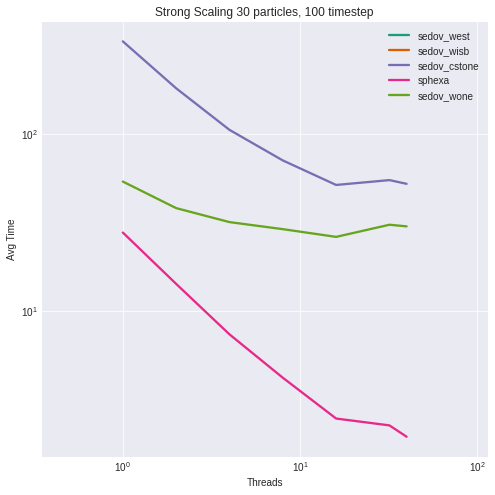

In [25]:
def strong_scaling_plot(df, versions,sizes=[20],time=100):
    # subplot for each size

    for size in sizes:
        for version in versions:
            data = df[df['Version'] == version]
            data = data[data['n_particles'] == size]
            data = data[data['Timestep'] == time]
            data = data.sort_values(by='Threads')
            plt.plot(data['Threads'], data['AvgTime'], label=version,lineWidth=2.5)
        # larger size
        plt.rcParams["figure.figsize"] = (8,8)
        plt.xlabel('Threads')
        plt.ylabel('Avg Time')
        plt.yscale('log')
        plt.xscale('log')
        plt.grid(True)
        # equal axes
        plt.axis('equal')
        plt.title(f'Strong Scaling {size} particles, {time} timestep')
        plt.legend()
        plt.show()

strong_scaling_plot(allresults, ['sedov_west','sedov_wisb','sedov_cstone','sphexa','sedov_wone'],sizes=[30],time=100)